### Clase 1 Modulo 6

#### Hierarchical clustering

In [11]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.colors import ListedColormap

In [3]:
# Generate synthetic data with four clusters
n_centers = np.random.randint(2, 6)
X, _ = make_blobs(
    n_samples=100, n_features=2,
    centers=n_centers,
    random_state=42
)

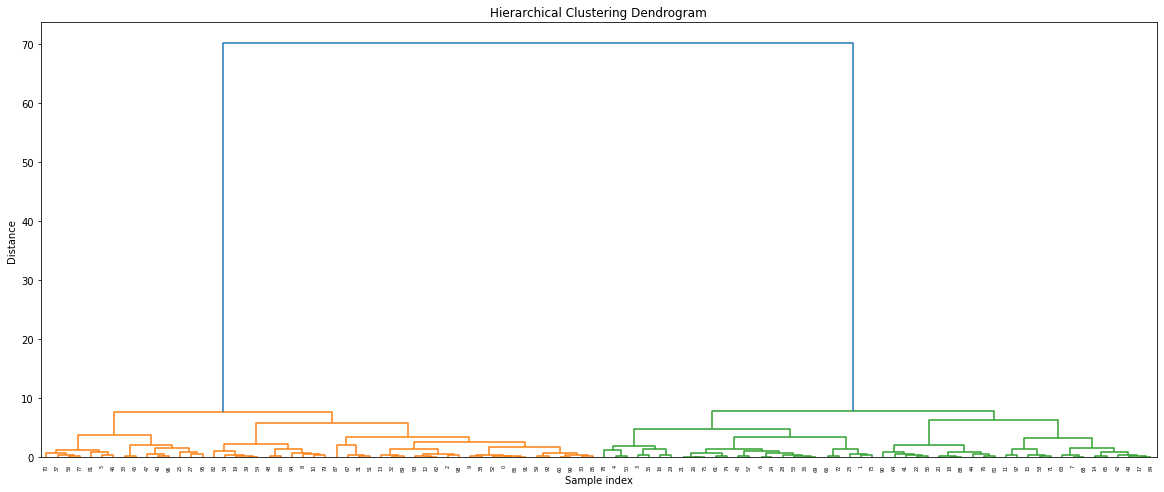

In [4]:
# generate the linkage matrix
Z = linkage(X, 'ward')

fig, ax = plt.subplots(figsize=(20, 8))
# plot the dendrogram
ax.set_title('Hierarchical Clustering Dendrogram')
ax.set_xlabel('Sample index')
ax.set_ylabel('Distance')

_ = dendrogram(Z, no_labels=False, ax=ax)

In [5]:
# Perform hierarchical clustering
n_clusters = 5
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clustering.fit(X)
labels = clustering.labels_

Text(0.5, 1.0, 'Clusters')

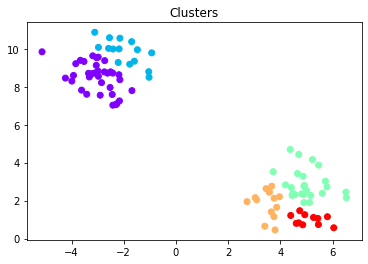

In [6]:
fig, ax = plt.subplots()

scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')

ax.set_title('Clusters')

#### Clustering with K-Means

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.metrics import pairwise_distances
import pandas as pd

In [2]:
# Generate synthetic data with four clusters
X, z = make_blobs(
    n_samples=1000, n_features=2, centers=4,
    random_state=42
)

Text(0.5, 1.0, 'Clusters')

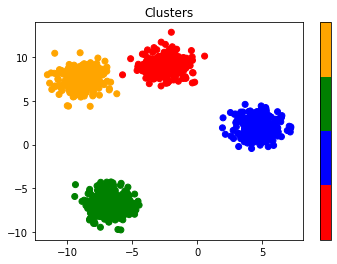

In [4]:
fig, ax = plt.subplots()
cmap = ListedColormap(['red', 'blue', 'green', 'orange'])
# cmap = ListedColormap(['red', 'blue', 'green', 'orange', "black"])

scatter = ax.scatter(X[:, 0], X[:, 1], c=z, cmap=cmap)

# Add a colorbar to show the correspondence between colors and clusters
colorbar = plt.colorbar(scatter)
colorbar.set_ticks([])

ax.set_title('Clusters')

In [4]:
X_df = pd.DataFrame(X)
X_df.sample()

,0,1
373,4.398643,2.325225


In [6]:
# SSE scores
sse_scores = []

# Perform k-means clustering for k values from 2 to 8
k_values = range(2, 9)

for k in k_values:
    # Fit the k-means model
    kmeans = KMeans(
        n_clusters=k,
        n_init="auto",
        random_state=42)
    kmeans.fit(X)
    # Compute SSE (inertia)
    sse = kmeans.inertia_
    sse_scores.append(sse)

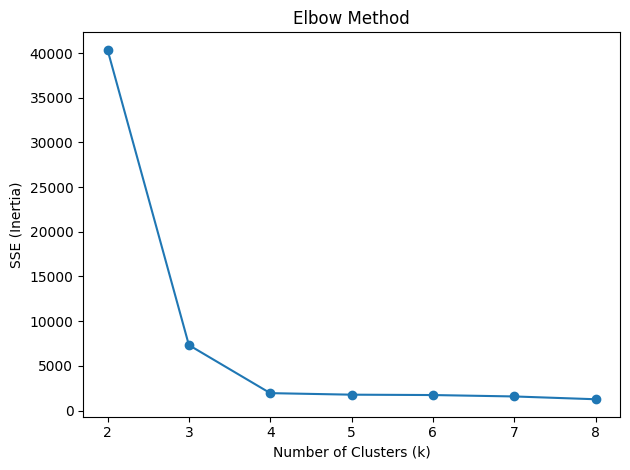

In [7]:
# Plot SSE and silhouette scores
fig, ax = plt.subplots()

# Plot SSE
ax.plot(k_values, sse_scores, marker='o')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('SSE (Inertia)')
ax.set_title('Elbow Method')

plt.tight_layout()

In [8]:
k = 4

# Fit the k-means model
kmeans = KMeans(
    n_clusters=k,
    n_init='auto',
    random_state=42
)
kmeans.fit(X)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [9]:
y = kmeans.predict(X)

In [12]:
np.unique(y)

array([0, 1, 2, 3])

Text(0.5, 1.0, 'Clusters')

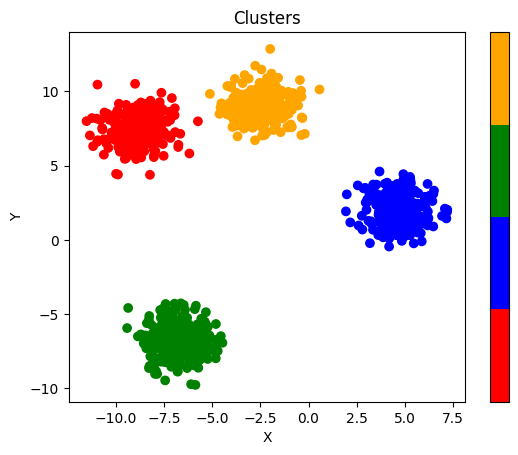

In [13]:
fig, ax = plt.subplots()
# Define a colormap with the same number of colors as clusters
# cmap = ListedColormap(['red', 'blue', 'green'])
cmap = ListedColormap(['red', 'blue', 'green', 'orange'])
# cmap = ListedColormap(['red', 'blue', 'green', 'orange', "black"])

scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

# Add a colorbar to show the correspondence between colors and clusters
colorbar = plt.colorbar(scatter)
colorbar.set_ticks([])

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Clusters')
# Plot each data point with a different color based on its cluster label

In [14]:
# intra-cluster distance (average distance within each cluster)
intra_distances = []
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

for label in np.unique(cluster_labels):
    cluster_data = X[cluster_labels == label]
    centroid = cluster_centers[label]
    distance_matrix = pairwise_distances(cluster_data, [centroid])
    mean_distance = np.mean(distance_matrix)
    intra_distances.append(mean_distance)

for n_cluster, distance in enumerate(intra_distances):
    print(f'Intra-Cluster distance {n_cluster}: {distance:.2f}')

Intra-Cluster distance 0: 1.23
Intra-Cluster distance 1: 1.22
Intra-Cluster distance 2: 1.26
Intra-Cluster distance 3: 1.23


In [15]:
# inter-cluster distance (average distance between different clusters)
inter_distances = []

for i in range(len(cluster_centers)):
    for j in range(i+1, len(cluster_centers)):
        distance_matrix = pairwise_distances([cluster_centers[i]], [cluster_centers[j]])
        mean_distance = np.mean(distance_matrix)
        inter_distances.append(mean_distance)

for distance in inter_distances:
    print(f'Inter-Cluster distance: {distance:.2f}')

Inter-Cluster distance: 14.55
Inter-Cluster distance: 14.38
Inter-Cluster distance: 6.56
Inter-Cluster distance: 14.43
Inter-Cluster distance: 10.02
Inter-Cluster distance: 16.40
